In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("fer2013_4o1_mqu8i13.csv")#
df=df.drop("Usage",axis=1)
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
len(df)

35887

In [ ]:
image_data=df.pixels.str.split(expand=True)
image_data

In [8]:
len(image_data)

33246

In [0]:
image_data.to_csv("column_split.csv")

In [0]:
image_data_1=pd.read_csv("column_split.csv")

In [11]:
len(image_data_1)

33246

In [12]:

df_emotion=df['emotion']
image_data_final=pd.concat([df_emotion,image_data],axis=1)
image_data_final.head()

,emotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,...,20,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,...,150,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,...,124,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,...,18,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30


In [13]:
len(image_data_final)

33246

In [14]:
image_data_final = image_data_final.fillna('0') # filling the missing values

image_data_final = image_data_final.astype(float) # converting to float

#image_data_final= image_data.drop("Unnamed: 0",axis=1)
image_data_final

,emotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.0,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,60.0,48.0,89.0,115.0,121.0,119.0,115.0,110.0,98.0,91.0,84.0,84.0,90.0,99.0,110.0,126.0,143.0,153.0,158.0,171.0,169.0,172.0,169.0,165.0,129.0,110.0,113.0,107.0,95.0,...,20.0,31.0,40.0,46.0,65.0,88.0,108.0,110.0,125.0,149.0,157.0,153.0,162.0,164.0,158.0,159.0,154.0,140.0,78.0,21.0,11.0,61.0,144.0,168.0,173.0,157.0,138.0,150.0,148.0,132.0,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0
1,0.0,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,182.0,154.0,153.0,164.0,173.0,178.0,185.0,185.0,189.0,187.0,186.0,193.0,194.0,185.0,183.0,186.0,180.0,173.0,166.0,161.0,147.0,133.0,172.0,151.0,114.0,161.0,161.0,146.0,131.0,...,150.0,129.0,143.0,135.0,115.0,102.0,111.0,124.0,112.0,109.0,132.0,146.0,135.0,149.0,148.0,143.0,163.0,156.0,159.0,150.0,139.0,128.0,116.0,125.0,133.0,109.0,130.0,147.0,130.0,121.0,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0
2,2.0,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,106.0,38.0,39.0,74.0,138.0,161.0,164.0,179.0,190.0,201.0,210.0,216.0,220.0,224.0,222.0,218.0,216.0,213.0,217.0,220.0,220.0,218.0,217.0,212.0,174.0,160.0,162.0,160.0,139.0,...,225.0,220.0,215.0,207.0,199.0,167.0,108.0,151.0,122.0,88.0,71.0,84.0,120.0,127.0,105.0,76.0,71.0,78.0,90.0,106.0,123.0,146.0,155.0,148.0,130.0,141.0,119.0,69.0,54.0,89.0,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0
3,4.0,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,21.0,22.0,32.0,34.0,21.0,19.0,43.0,52.0,13.0,26.0,40.0,59.0,65.0,12.0,20.0,63.0,99.0,98.0,98.0,111.0,75.0,62.0,41.0,73.0,118.0,140.0,192.0,186.0,187.0,...,124.0,150.0,161.0,167.0,169.0,167.0,162.0,164.0,169.0,181.0,172.0,168.0,169.0,170.0,174.0,179.0,180.0,182.0,196.0,208.0,226.0,230.0,140.0,113.0,114.0,125.0,135.0,141.0,172.0,214.0,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0
4,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,23.0,28.0,48.0,50.0,58.0,84.0,115.0,127.0,137.0,142.0,151.0,156.0,155.0,149.0,153.0,152.0,157.0,160.0,162.0,159.0,145.0,121.0,83.0,58.0,48.0,...,18.0,27.0,19.0,13.0,11.0,22.0,37.0,48.0,55.0,67.0,88.0,95.0,112.0,118.0,123.0,141.0,157.0,174.0,181.0,185.0,184.0,179.0,176.0,171.0,155.0,128.0,105.0,10.0,0.0,0.0,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,5.0,111.0,114.0,99.0,99.0,121.0,125.0,107.0,98.0,109.0,137.0,142.0,137.0,132.0,133.0,135.0,134.0,136.0,141.0,145.0,141.0,146.0,158.0,155.0,157.0,156.0,148.0,146.0,151.0,155.0,154.0,155.0,152.0,145.0,145.0,142.0,136.0,128.0,106.0,106.0,...,123.0,111.0,111.0,117.0,130.0,129.0,125.0,132.0,135.0,130.0,127.0,124.0,124.0,126.0,122.0,115.0,123.0,126.0,126.0,121.0,114.0,117.0,110.0,111.0,111.0,103.0,115.0,120.0,103.0,107.0,125.0,102.0,92.0,105.0,74.0,55.0,67.0,69.0,66.0,74.0
33242,5.0,108.0,98.0,70.0,51.0,66.0,89.0,97.0,108.0,119.0,113.0,111.0,115.0,119.0,120.0,123.0,139.0,149.0,153.0,159.0,158.0,158.0,155.0,150.0,151.0,149.0,148.0,146.0,144.0,140.0,138.0,137.0,134.0,131.0,129.0,123.0,112.0,106.0,101.0,97.0,...,78.0,77.0,80.0,83.0,82.0,86.0,89.0,77.0,109.0,77.0,51.0,66.0,49.0,65.0,79.0,81.0,76.0,72.0,61.0,135.0,116.0,56.0,50.0,61.0,59.0,65.0,65.0,58.0,68.0,41.0,25.0,34.0,40.0,50.0,66.0,106.0,174.0,232.0,250.0,249.0
33243,6.0,148.0,106.0,87.0,137.0,103.0,77.0,91.0,112.0,112.0,115.0,124.0,125.0,131.0,141.0,144.0,146.0,148.0,147.0,150.0,149.0,144.0,146.0,147.0,149.0

In [15]:
array=np.array(image_data_final.drop("emotion", axis=1))
array[0]

array([ 70.,  80.,  82., ..., 106., 109.,  82.])

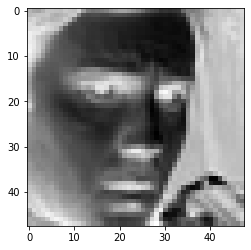

In [16]:
import matplotlib.pyplot as plt
plt.imshow(array[0].reshape(48,48),cmap=plt.cm.binary)
plt.show()

In [17]:
x=[]
for i in array:
    x.append(i.reshape(48,48))
    
x=np.array(x)
x

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]],

       ...,

       [[148., 106.,  87

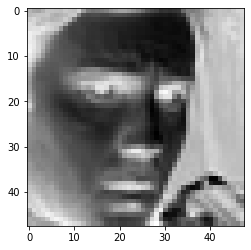

In [18]:
plt.imshow(x[0],cmap=plt.cm.binary)
plt.show()

In [19]:
y=np.array(image_data_final['emotion'])
y

array([0., 0., 2., ..., 6., 6., 5.])

In [20]:
len(x)

33246

In [21]:
len(y)

33246

In [0]:
import pickle

pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [0]:
#ignoring the warnings since tensor flow will give  a lot of them
import warnings
warnings.filterwarnings("ignore")

# Importing all libraries
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
import pickle

In [0]:
#Load data from pickle files we stored before
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [0]:
# Normalize the data. For pixel data max value of x is 255.0

x=x/255.0 #Other methods can also be used

In [28]:
x

array([[[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157,
         0.16862745, 0.16078431],
        [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294,
         0.21960784, 0.16862745],
        [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471,
         0.2745098 , 0.18039216],
        [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627,
         0.42745098, 0.32156863]],

       [[0.59215686, 0.58823529, 0.57647059, ..., 0.50588235,
         0.54901961, 0.47058824],
        [0.59215686, 0.58431373, 0.58431373, ..., 0.47843137,
         0.55294118, 0.5372549 ],
        [0.59215686, 0.59215686, 0.61176471, ..., 0.42745098,
         0.48235294, 0.57254902],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.72941176],
        [0.7

In [0]:
# Test Train Split
from sklearn.model_selection import train_test_split

data, labels = x,y

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)

In [30]:
len(x_train)/len(x)

0.8999879684774108

In [0]:
#Load data from pickle files we stored before
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [32]:
len(x)/len(y)

1.0

In [0]:
# CNN Model Creation

from keras.layers import BatchNormalization


In [37]:
# Creating the model
model = Sequential()

# Adding first layer

model.add(Conv2D(64,(5,5),input_shape=x.shape)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 33242, 44, 64)     76864     
_________________________________________________________________
activation (Activation)      (None, 33242, 44, 64)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16621, 22, 64)     0         
Total params: 76,864
Trainable params: 76,864
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Adding second layer

model.add(Conv2D(128,(5,5),input_shape=x.shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 33242, 44, 64)     76864     
_________________________________________________________________
activation (Activation)      (None, 33242, 44, 64)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16621, 22, 64)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16617, 18, 128)    204928    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16613, 14, 128)    409728    
_________________________________________________________________
activation_1 (Activation)    (None, 16613, 14, 128)    0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8306, 7, 128)     

In [40]:
# Adding second layer

model.add(Conv2D(256,(3,3),input_shape=x.shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 33242, 44, 64)     76864     
_________________________________________________________________
activation (Activation)      (None, 33242, 44, 64)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16621, 22, 64)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16617, 18, 128)    204928    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16613, 14, 128)    409728    
_________________________________________________________________
activation_1 (Activation)    (None, 16613, 14, 128)    0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8306, 7, 128)     

In [1]:
# Final Layer

model.add(Flatten())
model.add(Dense(128))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

NameError: ignored

In [0]:
# Model compile settings:

opt = tf.keras.optimizers.Adam(lr=1e-3)

# Compile model
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [0]:
# Fitting CNN Model
model.fit(x,y,batch_size=64,validation_split=0.1,epochs=20)

In [0]:
# Creating the confusion matrix

y_pred=model.predict_classes(x_test)
con_metrix=tf.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))